# 初始化训练数据

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

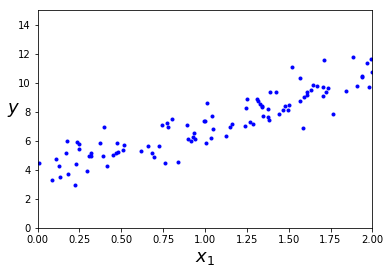

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # 扩展X

# BGD_batch（手撕）

In [21]:
alpha = 0.1 # 学习率
n_iterations = 1000 # 迭代次数
m = X.shape[0] # 样本数量

theta = np.random.randn(2,1)  # 初始化参数

梯度可根据公式所得

In [22]:
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - alpha*gradients

In [23]:
theta

array([[3.72656905],
       [3.37009098]])

In [24]:
X_test = np.array([[0], [2]]) # 测试点
X_test_b = np.c_[np.ones((2, 1)), X_test]  # 扩展X_test

In [25]:
X_test_b.dot(theta)

array([[ 3.72656905],
       [10.46675101]])

In [62]:
theta_path_bgd = []

def plot_gradient_descent(theta, alpha, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_test_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_test, y_predict, style)
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

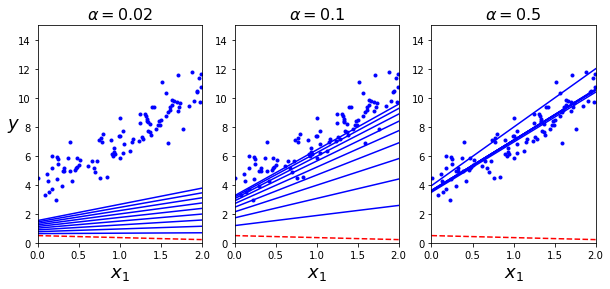

In [63]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 初始化参数theta

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, alpha=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)

# save_fig("gradient_descent_plot")
plt.show()

## sklearn实现

# Mini-batch （手撕）

一般来讲，只有数据集很大（$m>2000$）的情况下使用MGD才有效果

In [52]:
theta_path_mgd = [] # 画图用，将每个epoch 参数theta结果存入数组

n_iterations = 50 # 迭代次数
m = len(X_b) # 样本数
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 随机初始化参数

这里迭代次数为50，当迭代次数为100时，结果与BGD一样

In [53]:
t0,t1 = 200, 1000
def learning_schedule(t): # 计算学习步长
    return t0/(t+t1)

t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 1/minibatch_size*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [54]:
theta

array([[3.73156356],
       [3.36376763]])

## sklearn实现

# SGD （手撕）

In [69]:
theta_path_sgd = [] # 画图用，将每个epoch 参数theta结果存入数组
m = len(X_b) # 样本数
np.random.seed(42)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [70]:
n_epochs = 50 #迭代次数
t0, t1 = 5, 50  # 学习率超参

def learning_schedule(t): # 计算学习步长
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 随机初始化参数

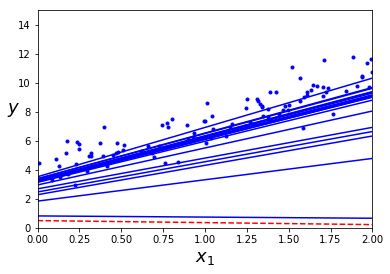

In [71]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
# save_fig("sgd_plot")                                
plt.show()                                           


In [72]:
theta

array([[3.82586718],
       [3.33450467]])

In [73]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

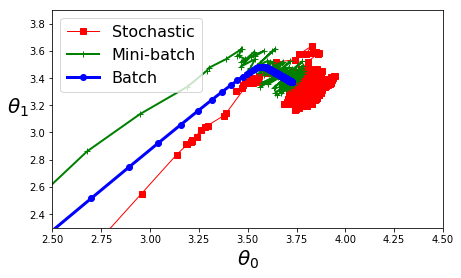

In [74]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

## sklearn实现

SGDRegressor非常适合回归问题具有大量训练样本 $(>10000)$，对于其他的问题，建议使用的Ridge， Lasso或ElasticNet。

这里只做一个示例

In [76]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [77]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.59834285]), array([3.40655034]))